<a href="https://colab.research.google.com/github/AishlyManglani/Deep-Learning_-CMPE258/blob/main/end%20to%20end%20modelling_deep%20learning/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
import datetime

In [2]:
# Load dataset
url = "/content/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Split data
X = data.drop("quality", axis=1)
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# TensorBoard setup
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

# Predictions
y_pred = model.predict(X_test)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 29.7828 - mae: 5.3585 - val_loss: 15.7019 - val_mae: 3.8050
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 12.3644 - mae: 3.2569 - val_loss: 3.7580 - val_mae: 1.6672
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3676 - mae: 1.8154 - val_loss: 2.3231 - val_mae: 1.2413
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8257 - mae: 1.6170 - val_loss: 2.0737 - val_mae: 1.1761
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4891 - mae: 1.4994 - val_loss: 1.7757 - val_mae: 1.0741
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.2802 - mae: 1.4698 - val_loss: 1.6003 - val_mae: 1.0249
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2050 - mae: 1.4161 - val_loss: 1.4349 - val_mae: 0.9661
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9484 - mae: 1.3460 - val_loss: 1.3347 - val_mae: 0.9364
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6852 - 

In [5]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.68
Mean Absolute Error: 0.66
R-squared: -0.04


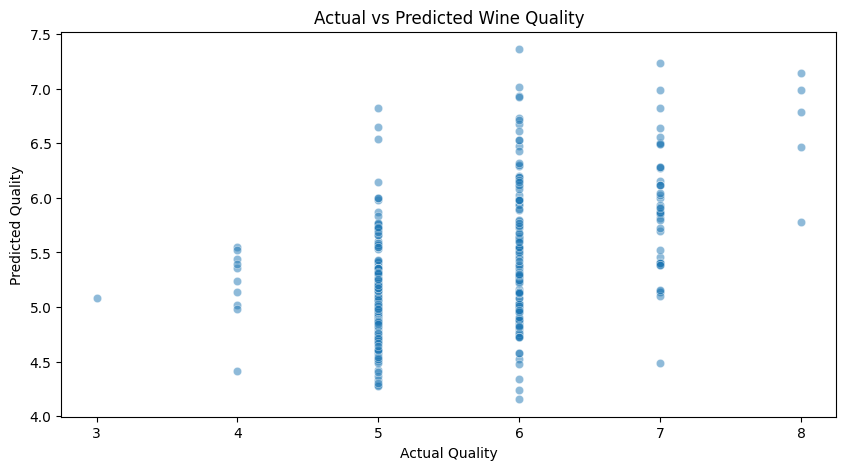

In [6]:
# Plot predictions
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()
